# Predicting Pulsar Star

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/dell/Downloads/ipynb datasets/pulsar_data_train.csv")

In [3]:
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [5]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [6]:
df.shape

(12528, 9)

In [7]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [8]:
df.tail()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0
12527,120.726562,50.472256,0.346178,0.184797,0.769231,11.792603,17.662222,329.548016,0.0


In [9]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [10]:
df.nunique()

 Mean of the integrated profile                   7192
 Standard deviation of the integrated profile    12510
 Excess kurtosis of the integrated profile       10793
 Skewness of the integrated profile              12528
 Mean of the DM-SNR curve                         7224
 Standard deviation of the DM-SNR curve          11348
 Excess kurtosis of the DM-SNR curve             12526
 Skewness of the DM-SNR curve                    11901
target_class                                         2
dtype: int64

In [11]:
df.nunique().count()

9

In [12]:
df.isnull().values.sum()

3538

In [13]:
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [14]:
(df.isnull().sum()/(len(df))) * 100

 Mean of the integrated profile                   0.000000
 Standard deviation of the integrated profile     0.000000
 Excess kurtosis of the integrated profile       13.848978
 Skewness of the integrated profile               0.000000
 Mean of the DM-SNR curve                         0.000000
 Standard deviation of the DM-SNR curve           9.402937
 Excess kurtosis of the DM-SNR curve              0.000000
 Skewness of the DM-SNR curve                     4.988825
target_class                                      0.000000
dtype: float64

<Axes: >

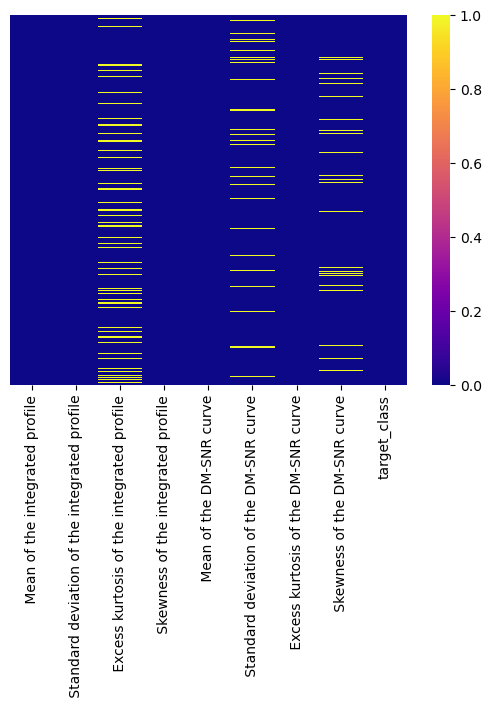

In [15]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='plasma')

In [16]:
df[' Skewness of the DM-SNR curve'].fillna(method='ffill', inplace=True)

<Axes: >

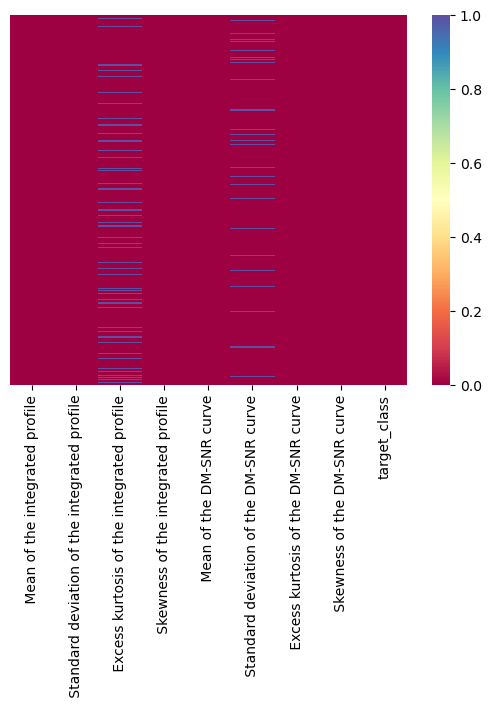

In [17]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='Spectral')

In [18]:
df[' Excess kurtosis of the integrated profile'].fillna(df[' Excess kurtosis of the integrated profile'].mean(), inplace=True)

<Axes: >

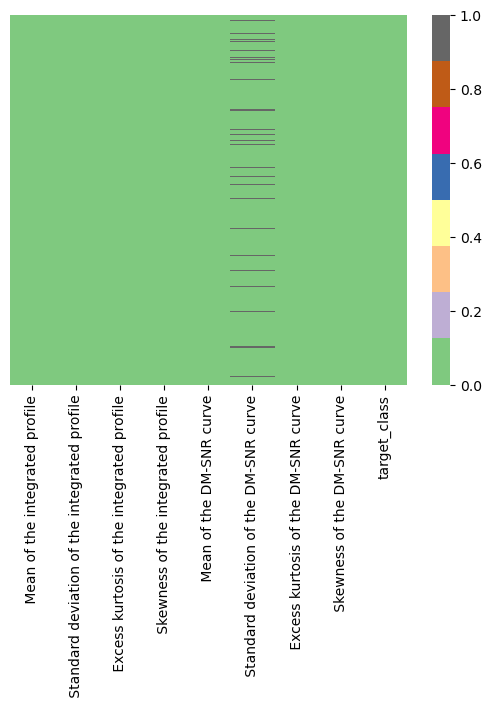

In [19]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='Accent')

In [20]:
df[' Standard deviation of the DM-SNR curve'].fillna(df[' Standard deviation of the DM-SNR curve'].median(), inplace=True)

<Axes: >

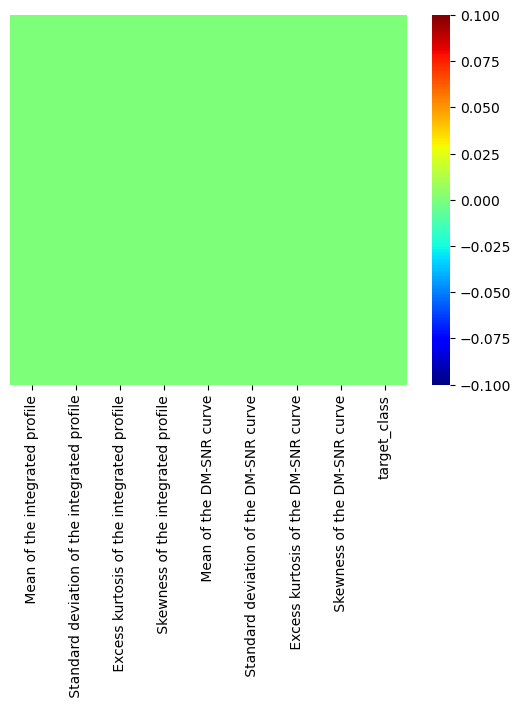

In [21]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='jet')

In [22]:
df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '121.15625'),
  Text(1, 0, '76.96875'),
  Text(2, 0, '130.5859375'),
  Text(3, 0, '156.3984375'),
  Text(4, 0, '84.8046875'),
  Text(5, 0, '121.0078125'),
  Text(6, 0, '79.34375'),
  Text(7, 0, '109.40625'),
  Text(8, 0, '95.0078125'),
  Text(9, 0, '109.15625')])

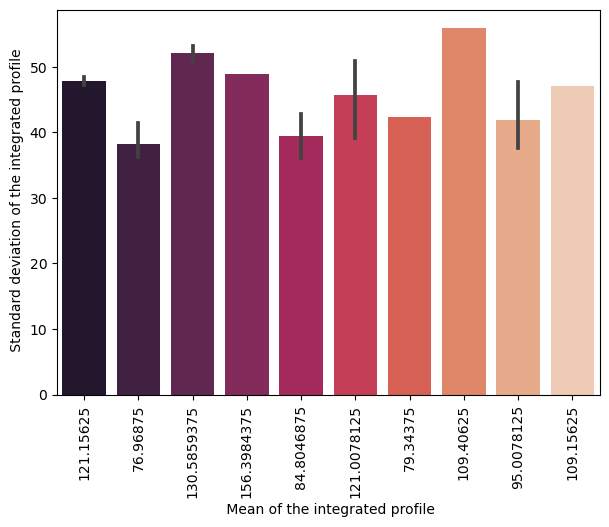

In [23]:
plt.figure(figsize=(7,5))
sns.barplot(x=' Mean of the integrated profile', y=' Standard deviation of the integrated profile', data=df, order=df[' Mean of the integrated profile'].iloc[:10], palette='rocket')
plt.xticks(rotation=90)

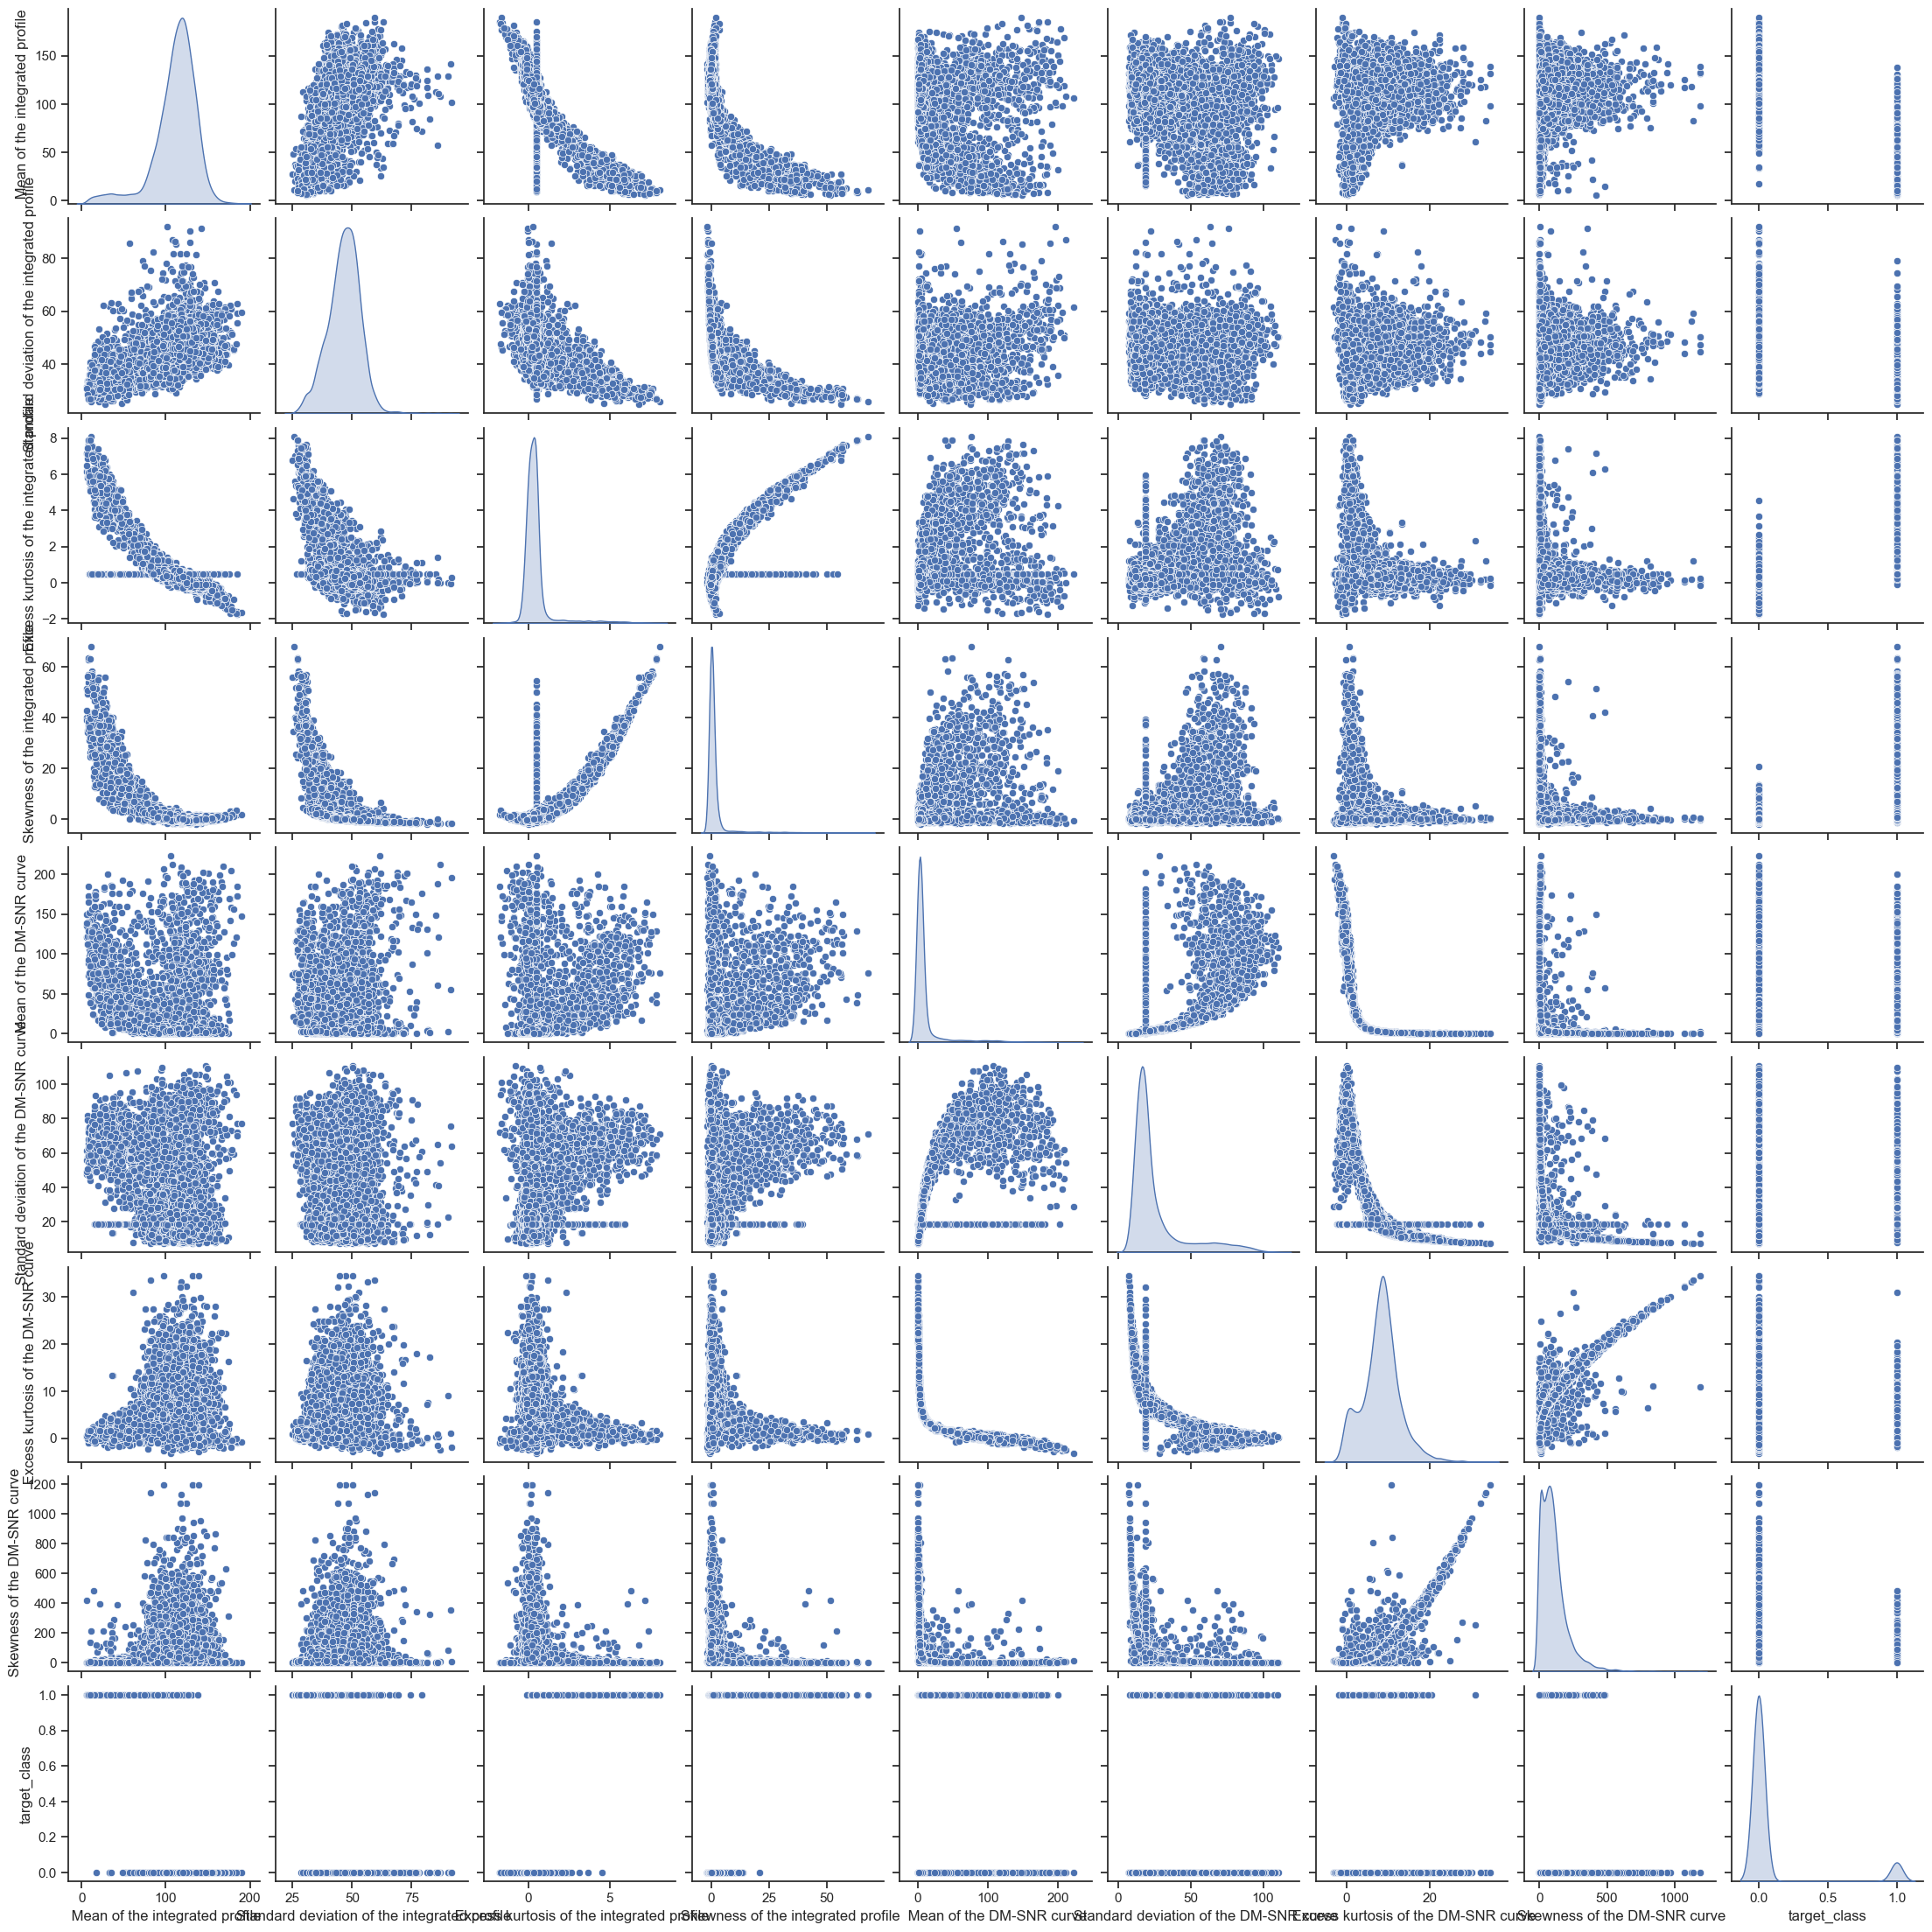

In [24]:
sns.set(style='ticks')
sns.pairplot(df, diag_kind='kde', markers='o')

<Axes: xlabel=' Mean of the integrated profile', ylabel='Count'>

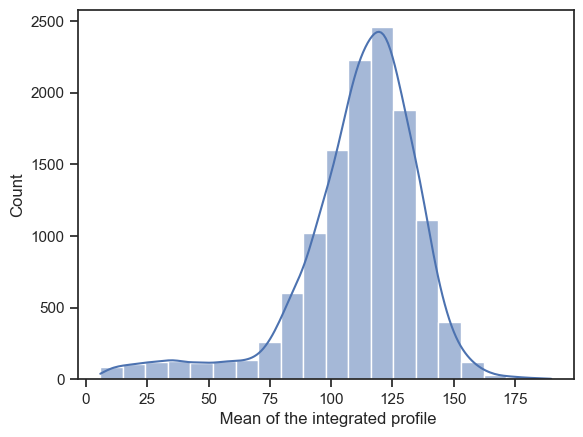

In [25]:
sns.histplot(df[' Mean of the integrated profile'], bins=20, kde=True)

<Axes: xlabel=' Standard deviation of the integrated profile', ylabel='Count'>

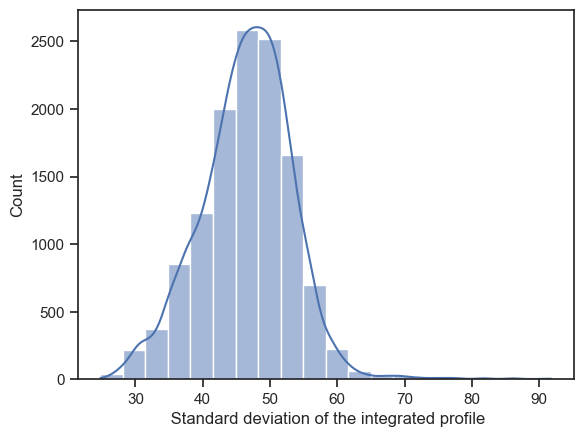

In [26]:
sns.histplot(df[' Standard deviation of the integrated profile'], bins=20, kde=True)

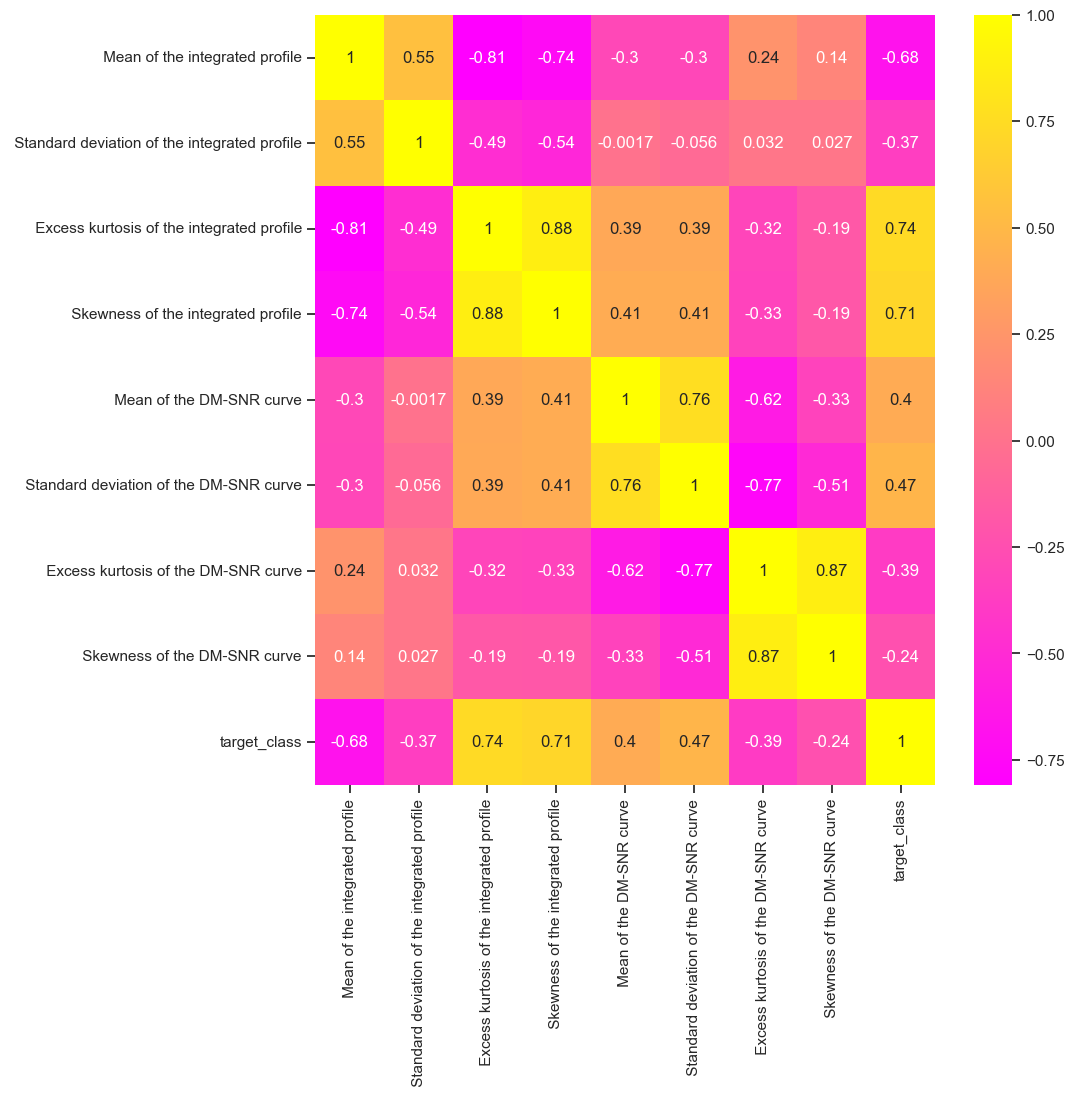

In [27]:
#Plotting correlation heatmap
plt.figure(figsize=(10, 10))
dataplot = sns.heatmap(df.corr(), cmap="spring", annot=True)
plt.show()                             # displaying heatmap

<Axes: xlabel=' Excess kurtosis of the DM-SNR curve'>

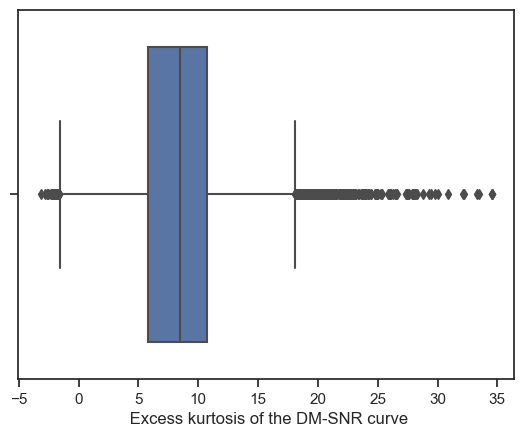

In [28]:
sns.boxplot(x = ' Excess kurtosis of the DM-SNR curve', data=df)

<Axes: xlabel=' Mean of the integrated profile'>

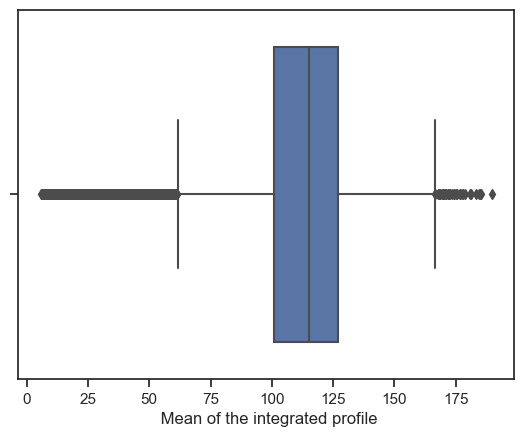

In [29]:
sns.boxplot(x = ' Mean of the integrated profile', data=df)

<Axes: xlabel=' Standard deviation of the integrated profile'>

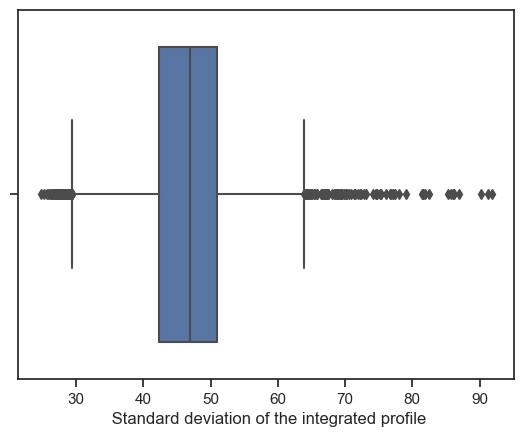

In [30]:
sns.boxplot(x = ' Standard deviation of the integrated profile', data=df)

<Axes: xlabel=' Mean of the integrated profile', ylabel=' Standard deviation of the integrated profile'>

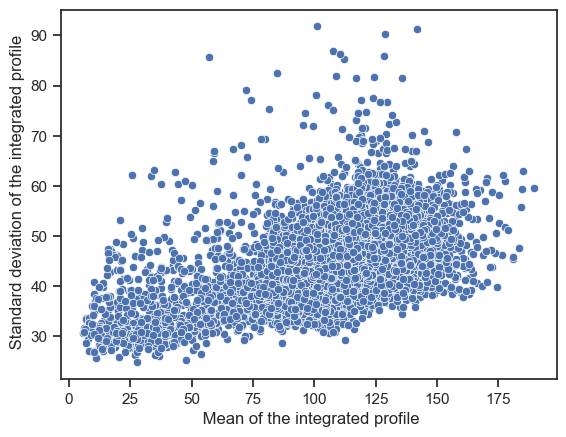

In [31]:
sns.scatterplot(x=' Mean of the integrated profile', y=' Standard deviation of the integrated profile', data=df)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '121.15625'),
  Text(1, 0, '76.96875'),
  Text(2, 0, '130.5859375'),
  Text(3, 0, '156.3984375'),
  Text(4, 0, '84.8046875'),
  Text(5, 0, '121.0078125')])

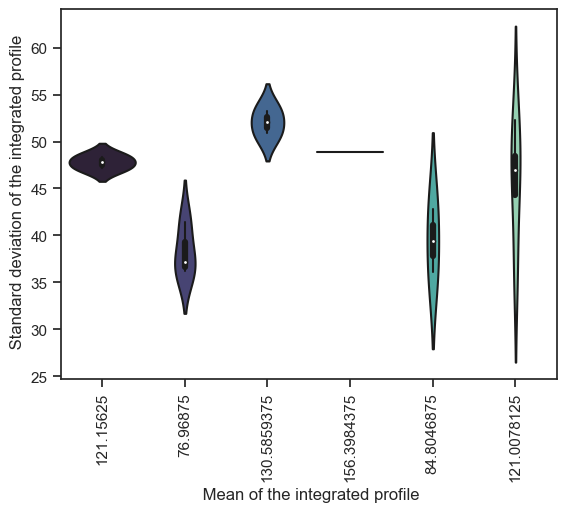

In [32]:
sns.violinplot(x=' Mean of the integrated profile', y=' Standard deviation of the integrated profile', data=df, order=df[' Mean of the integrated profile'].iloc[:6], palette='mako')
plt.xticks(rotation=90)

<Axes: xlabel=' Standard deviation of the DM-SNR curve'>

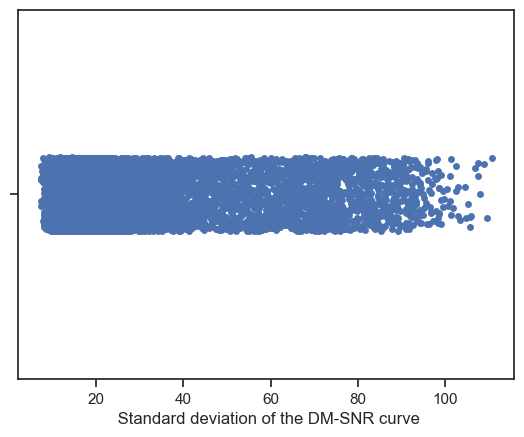

In [33]:
sns.stripplot(x=' Standard deviation of the DM-SNR curve', data=df)

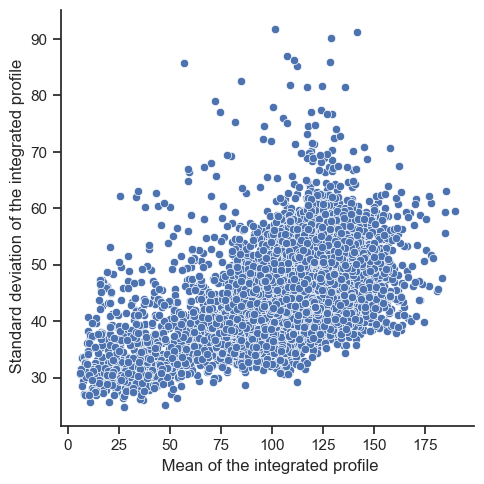

In [34]:
sns.relplot(x=' Mean of the integrated profile', y=' Standard deviation of the integrated profile', data=df)

<Axes: xlabel=' Mean of the DM-SNR curve', ylabel='Density'>

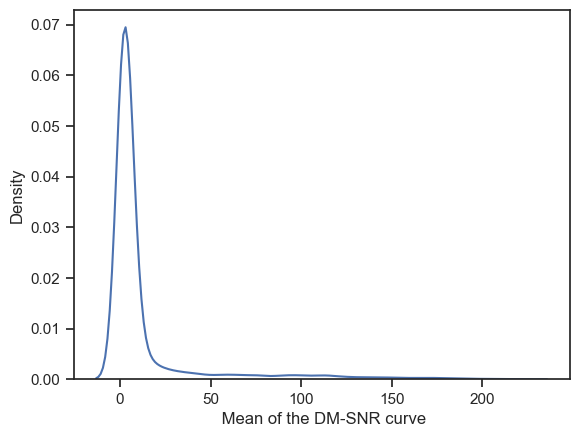

In [35]:
sns.kdeplot(x=' Mean of the DM-SNR curve', data=df)

<Axes: xlabel=' Mean of the DM-SNR curve', ylabel='Proportion'>

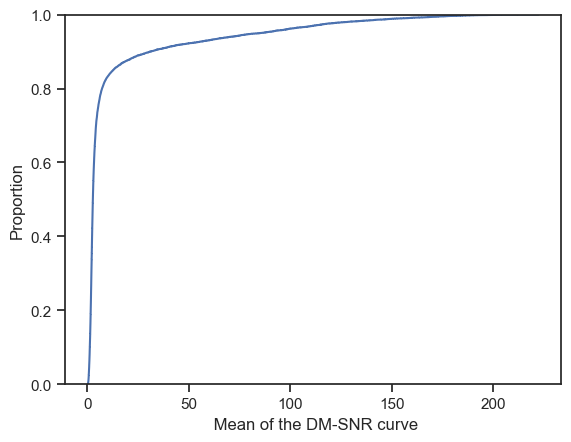

In [36]:
sns.ecdfplot(x=' Mean of the DM-SNR curve', data=df)

<Axes: xlabel=' Mean of the integrated profile', ylabel=' Standard deviation of the integrated profile'>

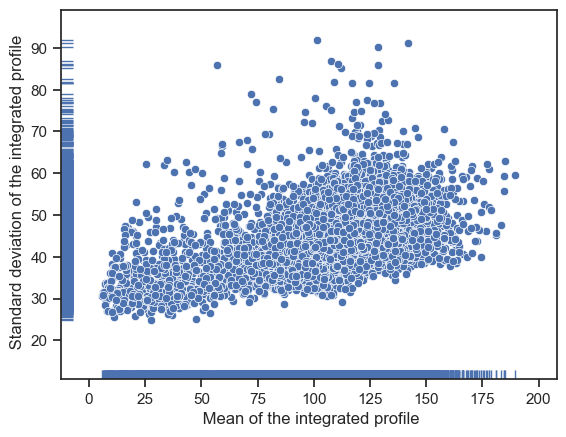

In [37]:
sns.scatterplot(x=' Mean of the integrated profile', y=' Standard deviation of the integrated profile', data=df)
sns.rugplot(x=' Mean of the integrated profile', y=' Standard deviation of the integrated profile', data=df)

In [38]:
df.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                     float64
dtype: object

In [39]:
X = df.drop(['target_class'], axis=1)
Y = df['target_class']

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [41]:
X_train.shape

(10022, 8)

In [42]:
X_test.shape

(2506, 8)

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Running with default hyperparameter

In [44]:
svc = SVC()

In [45]:
svc.fit(X_train, Y_train)

SVC()

In [46]:
Y_pred = svc.predict(X_test)

In [47]:
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy Score with default parameter : {:.2f}%". format(acc*100))

Accuracy Score with default parameter : 97.96%


In [48]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2279
         1.0       0.96      0.81      0.88       227

    accuracy                           0.98      2506
   macro avg       0.97      0.90      0.93      2506
weighted avg       0.98      0.98      0.98      2506



In [49]:
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[2272    7]
 [  44  183]]
True Positives(TP) =  2272
True Negatives(TN) =  183
False Positives(FP) =  7
False Negatives(FN) =  44


<Axes: >

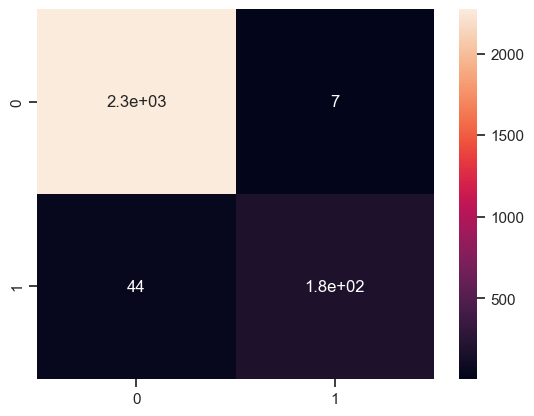

In [50]:
sns.heatmap(cm, annot=True)

In [51]:
yb = label_binarize(Y, classes=[0,1])

In [52]:
nc = yb.shape[1]

In [53]:
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))

In [54]:
Y_score = classifier.fit(X_train, Y_train).decision_function(X_test)

In [55]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range (nc):
    fpr, tpr, _ = roc_curve(Y_test, Y_score)
    roc_auc = auc(fpr, tpr)

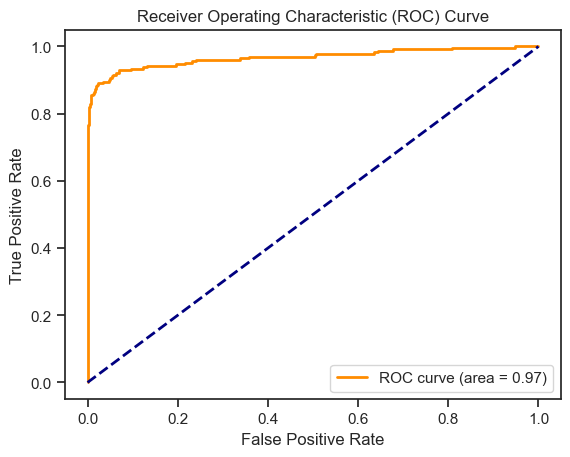

In [56]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', color='navy', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

SVM with linear kernel

In [57]:
linear_svc = SVC(kernel='linear')

In [58]:
linear_svc.fit(X_train, Y_train)

SVC(kernel='linear')

In [59]:
Y_predLinear = linear_svc.predict(X_test)

In [60]:
acc = accuracy_score(Y_test, Y_predLinear)
print("Accuracy Score with Linear Kernel : {:.2f}%". format(acc*100))

Accuracy Score with Linear Kernel : 97.77%


In [61]:
print(classification_report(Y_test, Y_predLinear))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2279
         1.0       0.96      0.78      0.86       227

    accuracy                           0.98      2506
   macro avg       0.97      0.89      0.93      2506
weighted avg       0.98      0.98      0.98      2506



In [62]:
cm = confusion_matrix(Y_test, Y_predLinear)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[2272    7]
 [  49  178]]
True Positives(TP) =  2272
True Negatives(TN) =  178
False Positives(FP) =  7
False Negatives(FN) =  49


<Axes: >

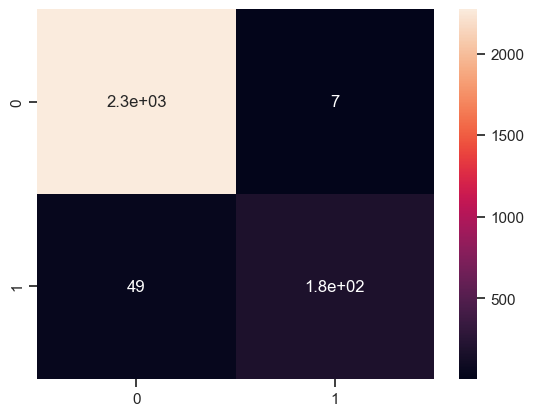

In [63]:
sns.heatmap(cm, annot=True)

SVM with RBF Kernel

In [64]:
rbf_svc = SVC(kernel='rbf')

In [65]:
rbf_svc.fit(X_train, Y_train)

SVC()

In [66]:
Y_predRBF = rbf_svc.predict(X_test)

In [67]:
acc = accuracy_score(Y_test, Y_predRBF)
print("Accuracy Score with RBF Kernel : {:.2f}%". format(acc*100))

Accuracy Score with RBF Kernel : 97.96%


In [68]:
print(classification_report(Y_test, Y_predRBF))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2279
         1.0       0.96      0.81      0.88       227

    accuracy                           0.98      2506
   macro avg       0.97      0.90      0.93      2506
weighted avg       0.98      0.98      0.98      2506



In [69]:
cm = confusion_matrix(Y_test, Y_predRBF)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[2272    7]
 [  44  183]]
True Positives(TP) =  2272
True Negatives(TN) =  183
False Positives(FP) =  7
False Negatives(FN) =  44


<Axes: >

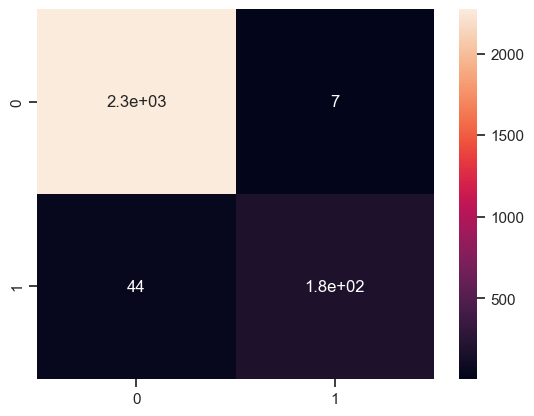

In [70]:
sns.heatmap(cm, annot=True)

SVM with Sigmoid Kernel

In [71]:
sigmoid_svc = SVC(kernel='sigmoid')

In [72]:
sigmoid_svc.fit(X_train, Y_train)

SVC(kernel='sigmoid')

In [73]:
Y_predsigmoid = sigmoid_svc.predict(X_test)

In [74]:
acc = accuracy_score(Y_test, Y_predsigmoid)
print("Accuracy Score with Sigmoid Kernel : {:.2f}%". format(acc*100))

Accuracy Score with Sigmoid Kernel : 87.67%


In [75]:
print(classification_report(Y_test, Y_predsigmoid))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      2279
         1.0       0.31      0.30      0.31       227

    accuracy                           0.88      2506
   macro avg       0.62      0.62      0.62      2506
weighted avg       0.87      0.88      0.88      2506



In [76]:
cm = confusion_matrix(Y_test, Y_predsigmoid)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[2128  151]
 [ 158   69]]
True Positives(TP) =  2128
True Negatives(TN) =  69
False Positives(FP) =  151
False Negatives(FN) =  158


<Axes: >

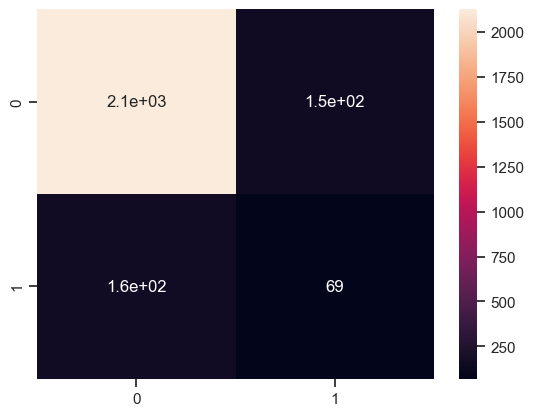

In [77]:
sns.heatmap(cm, annot=True)

SVM with Polynomial Kernel

In [78]:
poly_svc = SVC(kernel='poly')

In [79]:
poly_svc.fit(X_train, Y_train)

SVC(kernel='poly')

In [80]:
Y_predPoly = poly_svc.predict(X_test)

In [81]:
acc = accuracy_score(Y_test, Y_predPoly)
print("Accuracy Score with Polynomial Kernel : {:.2f}%". format(acc*100))

Accuracy Score with Polynomial Kernel : 97.69%


In [82]:
print(classification_report(Y_test, Y_predPoly))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2279
         1.0       0.98      0.76      0.86       227

    accuracy                           0.98      2506
   macro avg       0.98      0.88      0.92      2506
weighted avg       0.98      0.98      0.98      2506



In [83]:
cm = confusion_matrix(Y_test, Y_predPoly)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[2276    3]
 [  55  172]]
True Positives(TP) =  2276
True Negatives(TN) =  172
False Positives(FP) =  3
False Negatives(FN) =  55


<Axes: >

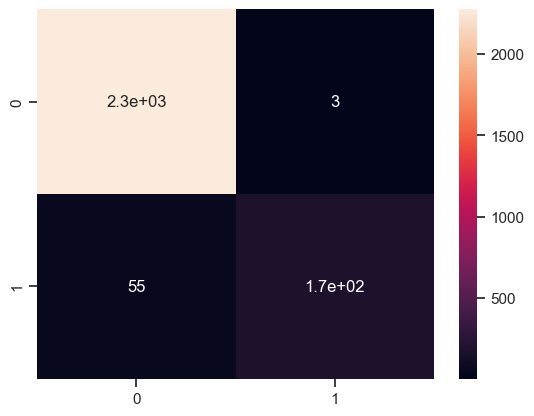

In [84]:
sns.heatmap(cm, annot=True)

Grid Search

In [85]:
param_grid = {
    'C' : [0.1, 1, 10, 100],
    'kernel' : ['linear', 'rbf', 'poly', 'sigmoid']
}

In [86]:
svcm = SVC()

In [87]:
grid_search = GridSearchCV(svcm, param_grid, cv=5)

In [88]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [89]:
best_param = grid_search.best_params_
print("Best hyperparameter : ", best_param)

Best hyperparameter :  {'C': 10, 'kernel': 'rbf'}


In [90]:
best_svm = SVC(C=best_param['C'], kernel=best_param['kernel'])

In [91]:
best_svm.fit(X_train, Y_train)

SVC(C=10)

In [92]:
Y_pred = best_svm.predict(X_test)

In [93]:
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy after Grid Search : {:.2f}%". format(acc * 100))

Accuracy after Grid Search : 98.12%


In [94]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2279
         1.0       0.96      0.83      0.89       227

    accuracy                           0.98      2506
   macro avg       0.97      0.91      0.94      2506
weighted avg       0.98      0.98      0.98      2506



In [95]:
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[2271    8]
 [  39  188]]
True Positives(TP) =  2271
True Negatives(TN) =  188
False Positives(FP) =  8
False Negatives(FN) =  39


<Axes: >

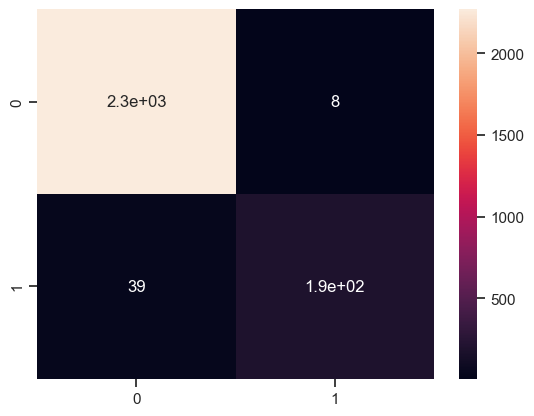

In [96]:
sns.heatmap(cm, annot=True)

Random Search

In [97]:
param_grid = {
    'C' : [0.1, 1, 10, 100],
    'kernel' : ['linear', 'rbf', 'poly', 'sigmoid']
}

In [98]:
svcm = SVC()

In [99]:
random_search = RandomizedSearchCV(svcm, param_grid, cv=5)

In [100]:
random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']})

In [101]:
best_param = random_search.best_params_
print("Best Parameter : ", best_param)

Best Parameter :  {'kernel': 'rbf', 'C': 100}


In [102]:
best_svm = SVC(C=best_param['C'], kernel=best_param['kernel'])

In [103]:
best_svm.fit(X_train, Y_train)

SVC(C=100)

In [104]:
Y_pred = best_svm.predict(X_test)

In [105]:
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy after Randomized Search: {:.2f}%" . format(acc * 100))

Accuracy after Randomized Search: 97.96%


In [106]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2279
         1.0       0.94      0.83      0.88       227

    accuracy                           0.98      2506
   macro avg       0.96      0.91      0.93      2506
weighted avg       0.98      0.98      0.98      2506



In [107]:
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[2267   12]
 [  39  188]]
True Positives(TP) =  2267
True Negatives(TN) =  188
False Positives(FP) =  12
False Negatives(FN) =  39


<Axes: >

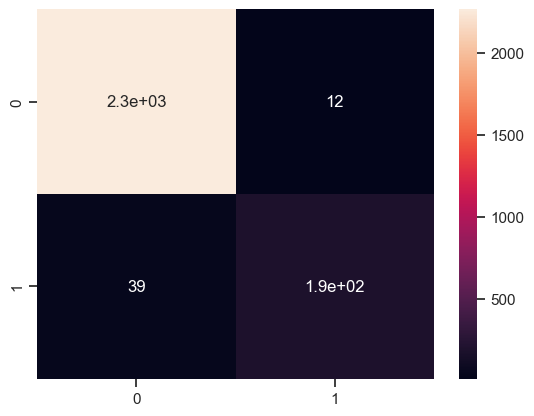

In [108]:
sns.heatmap(cm, annot=True)

In [109]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [110]:
param_space = {
    'C' : Real(1e-6, 1e+6, prior='log-uniform'),
    'kernel' : Categorical(['linear', 'rbf', 'poly', 'sigmoid']),
    'degree' : Integer(1,5),
    'gamma' : Real(1e-6, 1e+1, prior='log-uniform')
}

In [111]:
svcm = SVC()

In [112]:
bayes_search = BayesSearchCV(estimator=svcm, search_spaces=param_space, n_iter=50, cv=5, random_state=42)   #n_iter:no of iteration to search

In [113]:
bayes_search.fit(X_train, Y_train)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

# Naive Bayes

In [114]:
from sklearn import model_selection, naive_bayes, svm, metrics, feature_extraction

In [117]:
df.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                     float64
dtype: object

In [125]:
X = df.drop(['target_class'], axis=1)
Y = df['target_class']

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [127]:
X_train.shape

(10022, 8)

In [128]:
X_test.shape

(2506, 8)

In [129]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [130]:
bayes = naive_bayes.MultinomialNB()

In [131]:
bayes.fit(X_train, Y_train)

MultinomialNB()

In [132]:
Y_pred = bayes.predict(X_test)

In [133]:
acc = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy Score of Naive Bayes : {:.2f}%". format(acc*100))

Accuracy Score of Naive Bayes : 92.06%


In [135]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      2279
         1.0       1.00      0.12      0.22       227

    accuracy                           0.92      2506
   macro avg       0.96      0.56      0.59      2506
weighted avg       0.93      0.92      0.89      2506



In [137]:
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[2279    0]
 [ 199   28]]
True Positives(TP) =  2279
True Negatives(TN) =  28
False Positives(FP) =  0
False Negatives(FN) =  199


<Axes: >

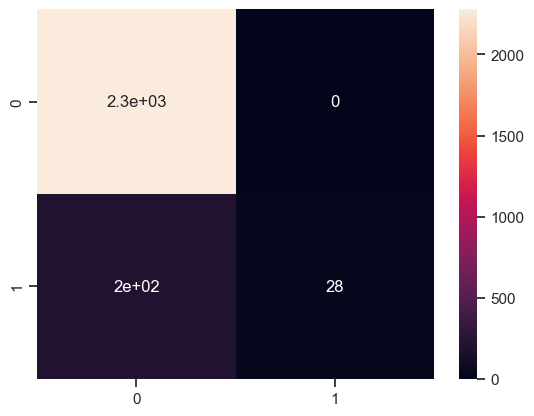

In [138]:
sns.heatmap(cm, annot=True)

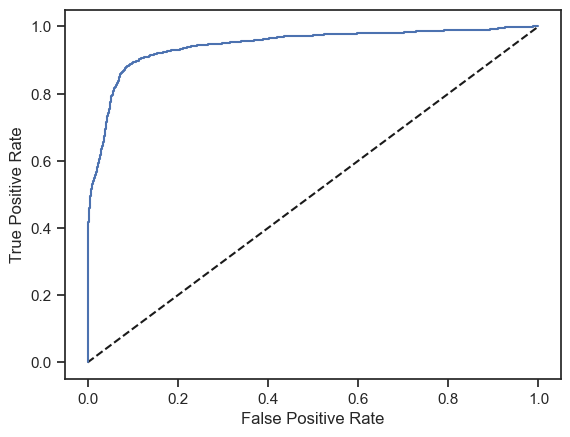

In [139]:
roc = bayes.predict_proba(X_train)[:,1]

fpr, tpr, threshold = metrics.roc_curve(Y_train, roc)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Naive Bayes - Grid Search

In [145]:
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'fit_prior': [True, False]
}

In [146]:
bayes = naive_bayes.MultinomialNB()

In [147]:
grid_search = GridSearchCV(bayes, param_grid, cv=5)

In [148]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'fit_prior': [True, False]})

In [149]:
best_param = grid_search.best_params_
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'alpha': 100, 'fit_prior': False}


In [150]:
best_nb = naive_bayes.MultinomialNB(alpha = best_param['alpha'], fit_prior = best_param['fit_prior'])

In [151]:
best_nb.fit(X_train, Y_train)

MultinomialNB(alpha=100, fit_prior=False)

In [152]:
Y_pred = best_nb.predict(X_test)

In [153]:
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy Score after Grid Search : {:.2f}%". format(acc*100))

Accuracy Score after Grid Search : 93.50%


In [154]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96      2279
         1.0       0.60      0.81      0.69       227

    accuracy                           0.93      2506
   macro avg       0.79      0.88      0.83      2506
weighted avg       0.95      0.93      0.94      2506



In [155]:
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[2158  121]
 [  42  185]]
True Positives(TP) =  2158
True Negatives(TN) =  185
False Positives(FP) =  121
False Negatives(FN) =  42


<Axes: >

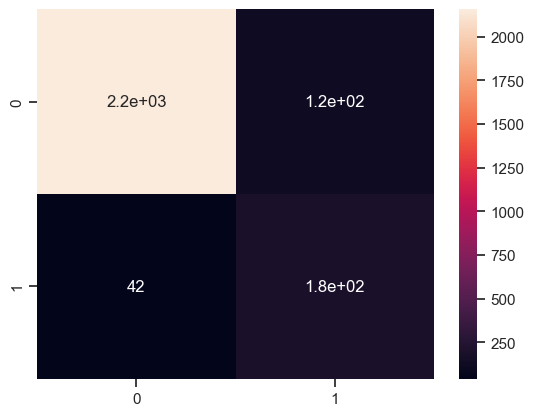

In [156]:
sns.heatmap(cm, annot=True)

Naive Bayes - Randomized Search

In [157]:
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'fit_prior': [True, False]
}

In [158]:
bayes = naive_bayes.MultinomialNB()

In [159]:
random_search = RandomizedSearchCV(bayes, param_grid, cv=5)

In [164]:
random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=MultinomialNB(),
                   param_distributions={'alpha': [0.1, 1, 10, 100],
                                        'fit_prior': [True, False]})

In [165]:
best_param = random_search.best_params_
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'fit_prior': False, 'alpha': 100}


In [166]:
best_nb = naive_bayes.MultinomialNB(alpha = best_param['alpha'], fit_prior = best_param['fit_prior'])

In [167]:
best_nb.fit(X_train, Y_train)

MultinomialNB(alpha=100, fit_prior=False)

In [168]:
Y_pred = best_nb.predict(X_test)

In [169]:
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy Score after Randomized Search : {:.2f}%". format(acc*100))

Accuracy Score after Randomized Search : 93.50%


In [170]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96      2279
         1.0       0.60      0.81      0.69       227

    accuracy                           0.93      2506
   macro avg       0.79      0.88      0.83      2506
weighted avg       0.95      0.93      0.94      2506



In [171]:
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[2158  121]
 [  42  185]]
True Positives(TP) =  2158
True Negatives(TN) =  185
False Positives(FP) =  121
False Negatives(FN) =  42


<Axes: >

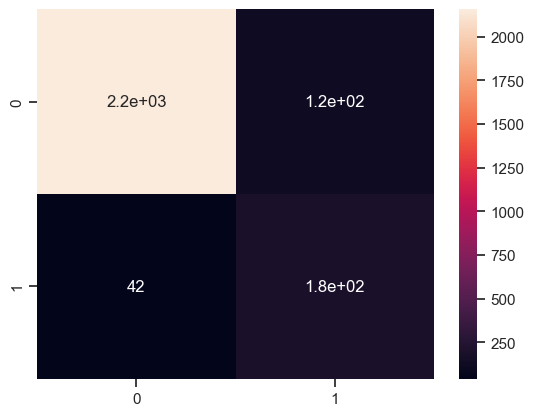

In [172]:
sns.heatmap(cm, annot=True)